<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


In [18]:
import os
import imageio
import torch
import matplotlib.pyplot as plt

In [19]:
# 1) Ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])
focus2 = torch.tensor([ 2.0, 0.0])
C      = 6.0

# 2) Training settings
num_points = 100
epochs     = 1000
lr         = 0.1

# 3) Plot + frame helper
def save_frame(pts, loss_type, epoch, loss_val):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(pts[:,0], pts[:,1], s=10)
    ax.scatter([focus1[0], focus2[0]], [focus1[1], focus2[1]],
               marker='x', s=100)
    ax.set_xlim(-6,6); ax.set_ylim(-6,6)
    ax.set_title(f"{loss_type} | Epoch {epoch} | Loss {loss_val:.4f}")
    ax.grid(True)
    outdir = f"frames_{loss_type}"
    os.makedirs(outdir, exist_ok=True)
    path = f"{outdir}/frame_{epoch:04d}.png"
    fig.savefig(path)
    plt.close(fig)
    return path

In [25]:
def optimize_and_gif(loss_type):
    points = (torch.rand((num_points,2)) * 10.0 - 5.0) \
                 .detach() \
                 .requires_grad_(True)
    optimizer = torch.optim.Adam([points], lr=lr)

    frame_paths = []
    for epoch in range(epochs+1):
        optimizer.zero_grad()

        d1  = torch.norm(points - focus1, dim=1)
        d2  = torch.norm(points - focus2, dim=1)
        eps = d1 + d2 - C

        if loss_type == "l0":
            loss = torch.mean((eps != 0).float())
        elif loss_type == "l1":
            loss = torch.mean(torch.abs(eps))
        elif loss_type == "linf":
            loss = torch.max(torch.abs(eps))
        else:
            raise ValueError(f"Unknown loss type: {loss_type}")

        # this will raise a RuntimeError for 'l0'
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            pts_np = points.detach().cpu().numpy()
            path = save_frame(pts_np, loss_type, epoch, loss.item())
            frame_paths.append(path)

    frames  = [imageio.imread(p) for p in frame_paths]
    gif_out = f"{loss_type}_ellipse.gif"
    imageio.mimsave(gif_out, frames, fps=5)
    print(f"✔ Saved movie: {gif_out}")
    return gif_out

In [22]:
optimize_and_gif("l0")

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [23]:
optimize_and_gif("l1")

<ipython-input-21-dc62352fbc1f>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames  = [imageio.imread(p) for p in frame_paths]


✔ Saved movie: l1_ellipse.gif


'l1_ellipse.gif'

In [24]:
optimize_and_gif("linf")

<ipython-input-21-dc62352fbc1f>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames  = [imageio.imread(p) for p in frame_paths]


✔ Saved movie: linf_ellipse.gif


'linf_ellipse.gif'

In [27]:
from IPython.display import display, HTML, Image

def show_gif(title, path):
    display(HTML(f"<h3>{title}</h3>"))
    try:
        display(Image(filename=path))
    except FileNotFoundError:
        display(HTML(f"<p style='color: red;'>{path} not found.</p>"))

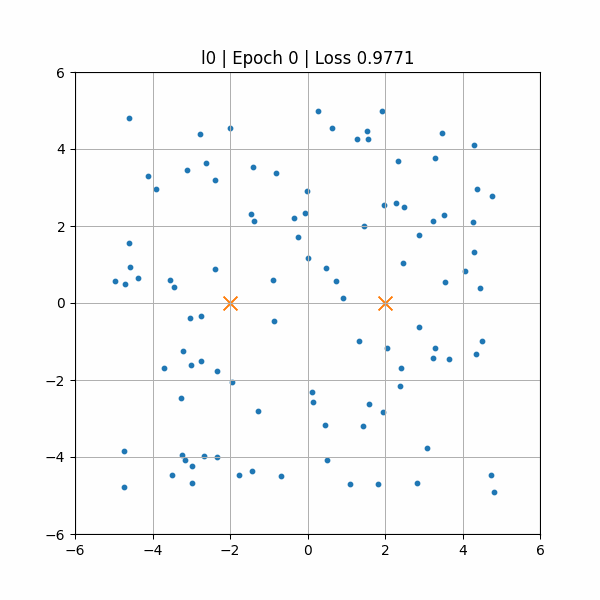

In [31]:
show_gif("ℓ₀ Loss", "l0_ellipse.gif")

# 1. $\ell_0$ norm

#### Why learning stalls after the very first step

The true objective  
$$
L^{(0)}=\frac1N\sum_{i=1}^{N}\mathbf1\!\bigl(\,\epsilon_i\neq0\bigr)
$$  
is discontinuous at $\epsilon_i = 0$ and absolutely flat everywhere else.  

In other words – the derivative is zero for every $\epsilon_i\neq0$; at the jump the derivative does not exist. Gradient-based methods therefore receive either no signal or an undefined one, so they cannot move the parameters after the first evaluation.  

Practically in PyTorch – implementing the indicator with  
```python
loss = torch.mean((eps != 0).float())
```  
produces a tensor that is detached from the computation graph (`requires_grad=False`). Calling `.backward()` raises an error—exactly what we observe.  

In short, genuine $\ell_0$ offers no usable gradient, hence no epoch-to-epoch improvement.


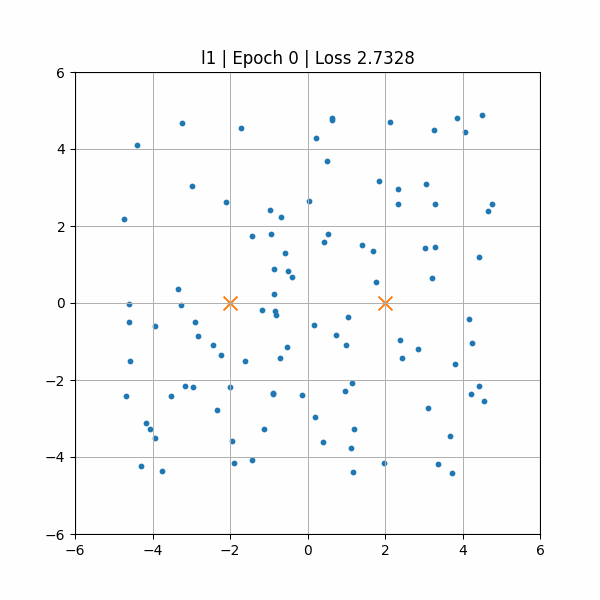

In [29]:
show_gif("ℓ₁ Loss Progress", "l1_ellipse.gif")

# 2. $\ell_1$ norm

#### Why the loss doesn't converge

With  
$$
L^{(1)}=\frac1N\sum_{i=1}^{N}\bigl|\epsilon_i\bigr|
$$  
we do get a gradient—except exactly at $\epsilon_i=0$. There the function is continuous but not differentiable: the sub-gradient suddenly flips sign when a point crosses the boundary of the ellipse.  

As training pushes the cloud toward the correct contour, each $\epsilon_i$ becomes tiny. A single optimizer step often overshoots from +ε to –ε, changing the gradient from +1 to –1 (or vice-versa). The algorithm then nudges the point back the other way, creating a small but persistent "wavy" motion.  

Visually the ellipse looks finished, yet the loss curve hovers above zero and oscillates slightly. That behaviour is characteristic of a piece-wise linear, non-smooth objective like ℓ₁.

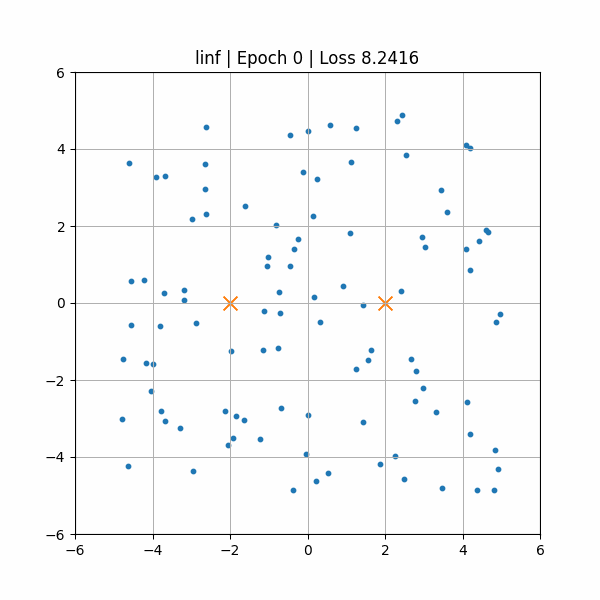

In [30]:
show_gif("ℓ∞ Loss Progress", "linf_ellipse.gif")

# 3. $\ell_\infty$ norm

#### Why optimisation is slow and rarely converges

The criterion  
$$
L^{(\infty)} = \max_{i}\bigl|\epsilon_i\bigr|
$$
always equals the single largest residual. All gradient (technically, sub-gradient) therefore flows into one point only—whichever currently has the worst error.  

The optimizer updates only the point with the largest error each epoch, leaving all others unchanged. When two or more points share that maximum residual, the sub-gradient can flip between them, causing abrupt shifts (as seen in the animation).

Because only one point moves per iteration—and occasional overshoots may undo part of a previous update—the loss decreases in a step-by-step, staircase-like manner and rarely reaches exactly zero within a typical training budget.